In [3]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tarfile
import seaborn as sns

from copy import deepcopy
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import DBSCAN
from pandas.plotting import scatter_matrix

from six.moves import urllib

%matplotlib inline
pd.set_option('display.max_columns',21)

In [4]:
hotel = pd.read_csv('hotel_bookings.csv')
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
print(f'Total shape {hotel.shape}')
print(f'All columns: {", ".join(hotel.columns.values)}')

Total shape (119390, 32)
All columns: hotel, is_canceled, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, company, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, reservation_status, reservation_status_date


In [6]:
hotel.describe(include="all")

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [7]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [8]:
#Заметим, что "reservation_status" идентичен "is_canceled"

hotel_clean = hotel.copy()
hotel_clean = hotel_clean.drop(['reservation_status'], axis=1)
hotel_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,2015-07-03


In [9]:
#Также в данных есть пропуски

nulls = hotel_clean.isnull().sum()
nulls[nulls > 0]

children         4
country        488
agent        16340
company     112593
dtype: int64

In [10]:
corr_matrix = hotel_clean.corr()
corr_matrix["is_canceled"].sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.293123
previous_cancellations            0.110133
adults                            0.060017
days_in_waiting_list              0.054186
adr                               0.047557
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
children                          0.005048
stays_in_weekend_nights          -0.001791
arrival_date_day_of_month        -0.006130
company                          -0.020642
babies                           -0.032491
previous_bookings_not_canceled   -0.057358
agent                            -0.083114
is_repeated_guest                -0.084793
booking_changes                  -0.144381
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_canceled, dtype: float64

In [11]:
#Выбросим часть признаков

hotel_clean = hotel_clean.drop(['stays_in_weekend_nights','arrival_date_day_of_month', 'children', 'arrival_date_week_number', 'company', 'reservation_status_date'], axis=1)
hotel_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,stays_in_week_nights,adults,babies,meal,country,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,July,0,2,0,BB,PRT,...,C,C,3,No Deposit,NaN,0,Transient,0.0,0,0
1,Resort Hotel,0,737,2015,July,0,2,0,BB,PRT,...,C,C,4,No Deposit,NaN,0,Transient,0.0,0,0
2,Resort Hotel,0,7,2015,July,1,1,0,BB,GBR,...,A,C,0,No Deposit,NaN,0,Transient,75.0,0,0
3,Resort Hotel,0,13,2015,July,1,1,0,BB,GBR,...,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0
4,Resort Hotel,0,14,2015,July,2,2,0,BB,GBR,...,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1


In [12]:
#Будет сложно заполнить данные с отсутствующей страной, поэтому их проще выбросить.

hotel_clean = hotel_clean[hotel_clean['country'].notna()]

#Работа с пропусками
def fillna(hotel_data, replase_dict):
    for column, value in replase_dict.items():
        hotel_data[column] = hotel_data[column].fillna(value)
        
nan_col = []

values_for_fill = []

values_for_fill.append(round(hotel_clean['agent'].mean()))


print("Values for replacing: ", values_for_fill)

replace_dict = dict(zip(nan_col, values_for_fill))
fillna(hotel_clean, replace_dict)

hotel_clean.head()

Values for replacing:  [87]


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,stays_in_week_nights,adults,babies,meal,country,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,July,0,2,0,BB,PRT,...,C,C,3,No Deposit,NaN,0,Transient,0.0,0,0
1,Resort Hotel,0,737,2015,July,0,2,0,BB,PRT,...,C,C,4,No Deposit,NaN,0,Transient,0.0,0,0
2,Resort Hotel,0,7,2015,July,1,1,0,BB,GBR,...,A,C,0,No Deposit,NaN,0,Transient,75.0,0,0
3,Resort Hotel,0,13,2015,July,1,1,0,BB,GBR,...,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0
4,Resort Hotel,0,14,2015,July,2,2,0,BB,GBR,...,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1


In [13]:
#Работа с категориальными признаками
#Сколько всего уникальных значений в категориальных столбцах:


categorial = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']
for item in categorial:
    print(len(hotel_clean[item].unique()), end =', ')

2, 12, 5, 177, 8, 5, 10, 12, 3, 4, 

In [14]:
#Извавляемся от категориальных признаков, присваивая им числовые значения:

label_encoder = LabelEncoder()
print(categorial)
for each in categorial:
    cat = hotel_clean[each]
    cat_encoded = label_encoder.fit_transform(cat)
    hotel_clean[each] = cat_encoded

['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']


In [15]:
hotel_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,stays_in_week_nights,adults,babies,meal,country,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,1,0,342,2015,5,0,2,0,0,135,...,2,2,3,0,NaN,0,2,0.0,0,0
1,1,0,737,2015,5,0,2,0,0,135,...,2,2,4,0,NaN,0,2,0.0,0,0
2,1,0,7,2015,5,1,1,0,0,59,...,0,2,0,0,NaN,0,2,75.0,0,0
3,1,0,13,2015,5,1,1,0,0,59,...,0,0,0,0,304.0,0,2,75.0,0,0
4,1,0,14,2015,5,2,2,0,0,59,...,0,0,0,0,240.0,0,2,98.0,0,1


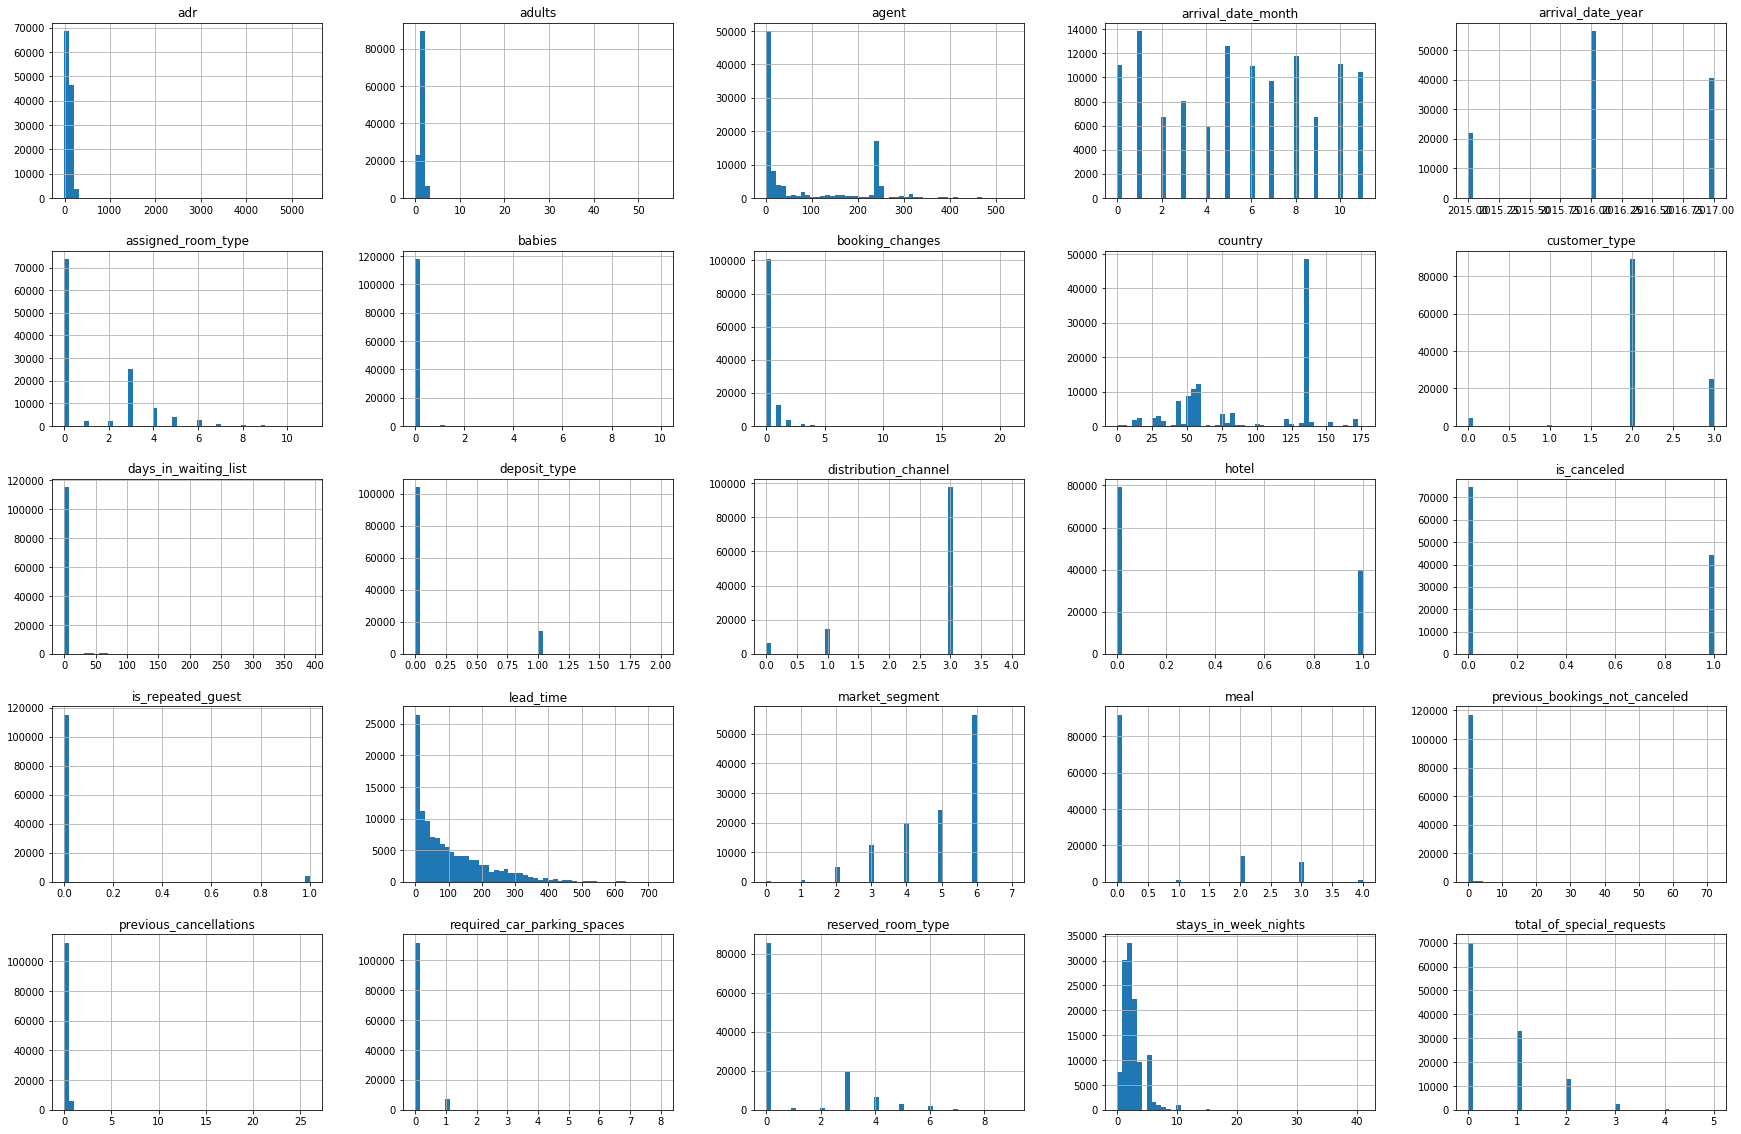

In [16]:
hotel_clean.hist(bins = 50,figsize=(30,20))
plt.savefig('./hotel.png')
plt.show()

In [17]:
hotel_clean.describe(include="all")

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,stays_in_week_nights,adults,babies,meal,country,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
count,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,...,118902.000000,118902.000000,118902.000000,118902.000000,102896.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000
mean,0.333014,0.371373,104.308027,2016.157617,5.490286,2.502136,1.858404,0.007948,0.557097,92.990076,...,0.989958,1.325209,0.221174,0.125288,86.544074,2.330676,2.137592,102.000808,0.061883,0.571706
std,0.471293,0.483174,106.903127,0.707479,3.535015,1.900165,0.578576,0.097379,1.069544,44.676327,...,1.696122,1.875542,0.652775,0.335137,110.713678,17.630161,0.577870,50.487004,0.244168,0.792678
min,0.000000,0.000000,0.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,0.000000,18.000000,2016.000000,2.000000,1.000000,2.000000,0.000000,0.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,2.000000,70.000000,0.000000,0.000000
50%,0.000000,0.000000,69.000000,2016.000000,6.000000,2.000000,2.000000,0.000000,0.000000,81.000000,...,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,2.000000,95.000000,0.000000,0.000000
75%,1.000000,1.000000,161.000000,2017.000000,8.000000,3.000000,2.000000,0.000000,0.000000,135.000000,...,3.000000,3.000000,0.000000,0.000000,229.000000,0.000000,2.000000,126.000000,0.000000,1.000000
max,1.000000,1.000000,737.000000,2017.000000,11.000000,41.000000,55.000000,10.000000,4.000000,176.000000,...,9.000000,11.000000,21.000000,2.000000,535.000000,391.000000,3.000000,5400.000000,8.000000,5.000000


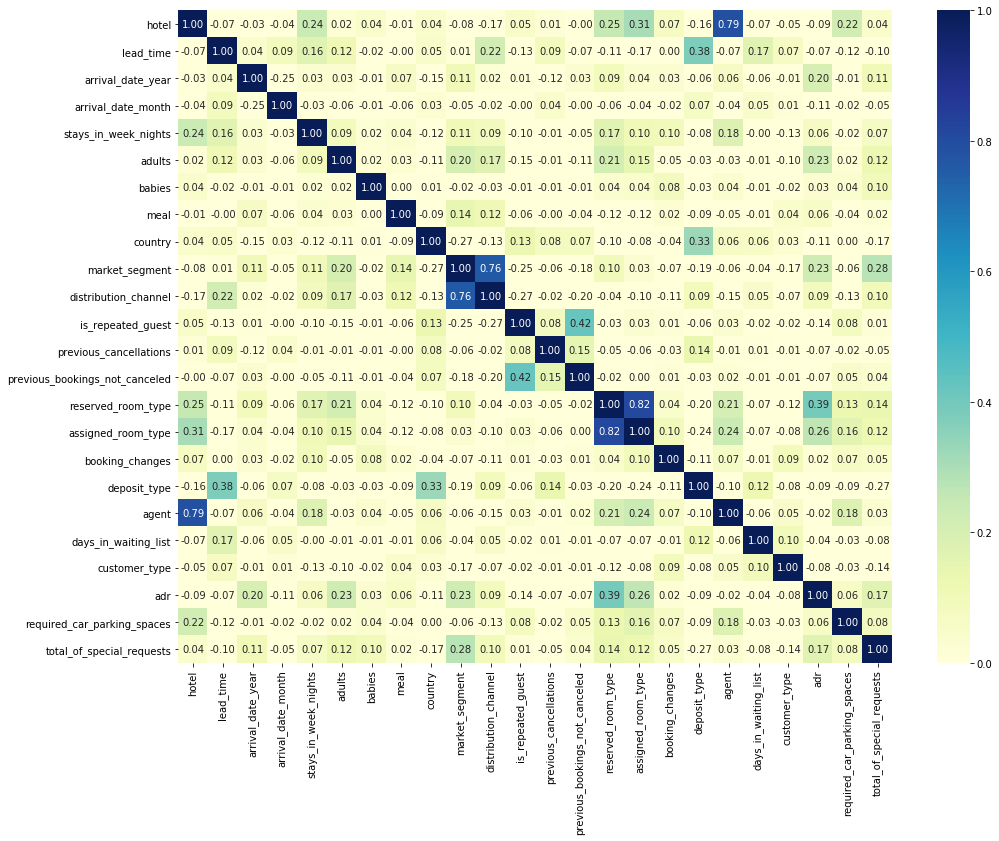

In [18]:
#Получим корреляционную матрицу
plt.figure(figsize=(16, 12))
sns.heatmap(hotel_clean.drop('is_canceled', axis=1).corr(), cmap='YlGnBu', annot=True, fmt='.2f', vmin=0);

In [19]:
corr_matrix = hotel_clean.corr()
corr_matrix['is_canceled'].sort_values(ascending=False)

is_canceled                       1.000000
deposit_type                      0.468466
lead_time                         0.291940
country                           0.270254
distribution_channel              0.165596
previous_cancellations            0.109914
adults                            0.058408
market_segment                    0.056972
days_in_waiting_list              0.054008
adr                               0.046133
stays_in_week_nights              0.024103
arrival_date_year                 0.016339
arrival_date_month               -0.001800
meal                             -0.018679
babies                           -0.032523
previous_bookings_not_canceled   -0.055495
reserved_room_type               -0.062228
customer_type                    -0.068698
agent                            -0.081954
is_repeated_guest                -0.085185
hotel                            -0.133990
booking_changes                  -0.144669
assigned_room_type               -0.175882
required_ca

In [20]:
#На основании этих данных, уберем еще параметры.

cols = ['arrival_date_month', 'arrival_date_year', 'meal', 'stays_in_week_nights', 'adr', 'agent',
       'reserved_room_type', 'deposit_type', 'assigned_room_type', 'distribution_channel', 'previous_bookings_not_canceled']
hotel_clean = hotel_clean.drop(cols, axis=1)


In [22]:
#Результирующее описание
hotel_clean.describe(include="all")

,hotel,is_canceled,lead_time,adults,babies,country,market_segment,is_repeated_guest,previous_cancellations,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
count,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000
mean,0.333014,0.371373,104.308027,1.858404,0.007948,92.990076,4.934812,0.032010,0.087139,0.221174,2.330676,2.137592,0.061883,0.571706
std,0.471293,0.483174,106.903127,0.578576,0.097379,44.676327,1.261363,0.176026,0.845855,0.652775,17.630161,0.577870,0.244168,0.792678
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,18.000000,2.000000,0.000000,56.000000,4.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,0.000000,0.000000,69.000000,2.000000,0.000000,81.000000,5.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
75%,1.000000,1.000000,161.000000,2.000000,0.000000,135.000000,6.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,1.000000,737.000000,55.000000,10.000000,176.000000,7.000000,1.000000,26.000000,21.000000,391.000000,3.000000,8.000000,5.000000


In [23]:
hotel_clean.to_csv('hotel_clean.csv')